In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# Set paths to image folders
normal_dir = "C:/Users/user/Downloads/DeepLearning-CNN-Brain-Stroke-Prediction-main/DeepLearning-CNN-Brain-Stroke-Prediction-main/Dataset/Normal"
stroke_dir = "C:/Users/user/Downloads/DeepLearning-CNN-Brain-Stroke-Prediction-main/DeepLearning-CNN-Brain-Stroke-Prediction-main/Dataset/Stroke"

In [5]:
# Image parameters
IMG_SIZE = 64  # Resize images to 64x64 pixels
BATCH_SIZE = 32
EPOCHS = 10

In [7]:
# Function to load and preprocess images
def load_images(image_dir, label):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.endswith('.png') or filename.endswith('.jpg'):  # Assuming the images are in these formats
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to standard size
            img = img.astype('float32') / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)
    return images, labels

In [9]:
# Load images from both folders
normal_images, normal_labels = load_images(normal_dir, label=0)  # Label 0 for normal
stroke_images, stroke_labels = load_images(stroke_dir, label=1)  # Label 1 for stroke

In [11]:

# Combine the data
all_images = normal_images + stroke_images
all_labels = normal_labels + stroke_labels

In [13]:
# Convert to NumPy arrays
X = np.array(all_images)
y = np.array(all_labels)

In [15]:
# Define a simple CNN model
def build_model(input_shape=(IMG_SIZE, IMG_SIZE, 3)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [17]:
# Build the model
model = build_model()


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.5658 - loss: 0.6742 - val_accuracy: 0.6503 - val_loss: 0.6031
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7003 - loss: 0.5770 - val_accuracy: 0.7410 - val_loss: 0.5054
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.7731 - loss: 0.4827 - val_accuracy: 0.8087 - val_loss: 0.4262
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8477 - loss: 0.3410 - val_accuracy: 0.8175 - val_loss: 0.3777
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8856 - loss: 0.2612 - val_accuracy: 0.8787 - val_loss: 0.2964
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9145 - loss: 0.1921 - val_accuracy: 0.8798 - val_loss: 0.3208
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9392 - loss: 0.1512 - val_accuracy: 0.8601 - val_loss: 0.3495
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9485 - loss: 0.1296 - val_accu

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9281 - loss: 0.2377
Test accuracy: 0.9333


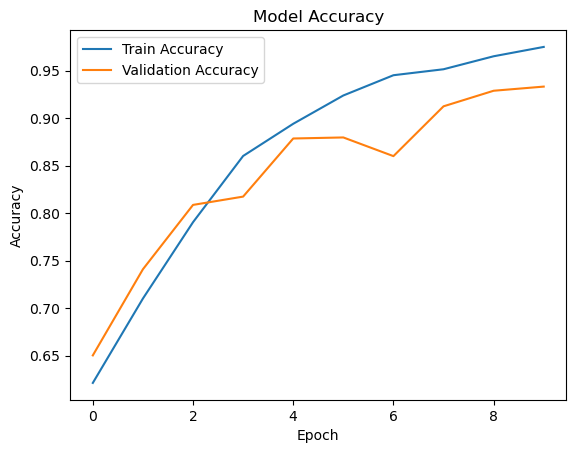

In [27]:
# Plot training history (accuracy and loss)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


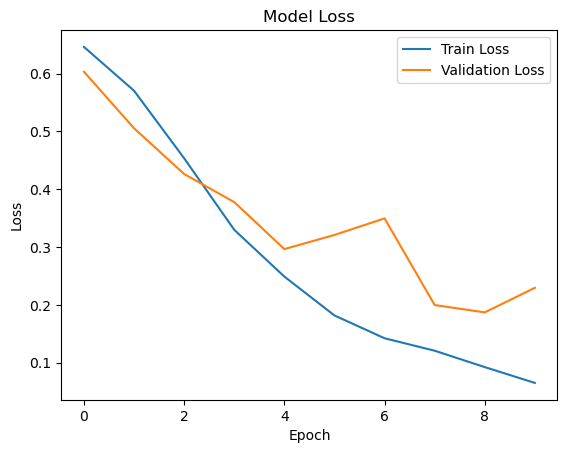

In [29]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [31]:
# Save the model for later use
model.save('stroke_prediction_model.h5')

In [33]:
# Function to predict new images
def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize image
    img = img.astype('float32') / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    if prediction > 0.5:
        return 'Stroke'
    else:
        return 'Normal'

In [37]:
print(predict_image("C:/Users/user/Downloads/DeepLearning-CNN-Brain-Stroke-Prediction-main/DeepLearning-CNN-Brain-Stroke-Prediction-main/Dataset/Normal/1 (1).png"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Normal
